## Q1 Forest Fires Dataset - Exploratory Data Analysis

In [64]:
##REFERENCE :  https://cppsecrets.com/users/5271114105115104979810446114107495548525364103109971051084699111109/TRAINING-MACHINE-LEARNING-MODEL-WITH-TENSORFLOW-CLOUD.php
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
forest = pd.read_csv("forestfires.csv")
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [66]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [67]:
forest.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

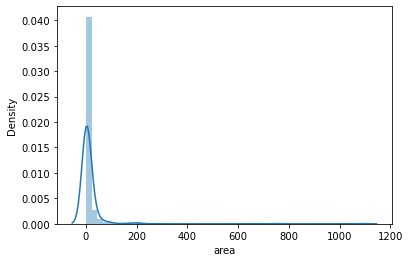

In [68]:
sns.distplot(forest['area'])

In [69]:
#LOG-TRANSFORMATION OF THE TARGET VARIABLE
forest['Log-area']=np.log10(forest['area']+1)

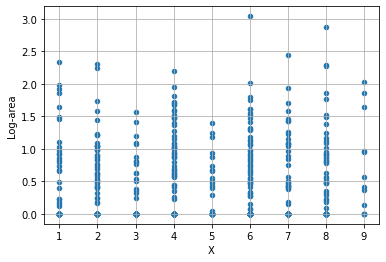

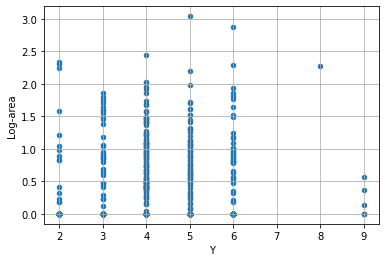

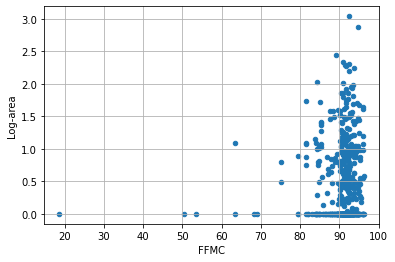

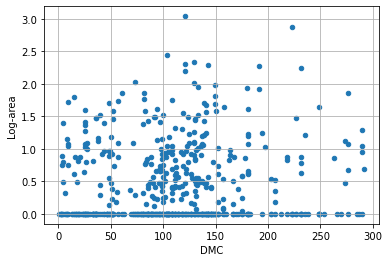

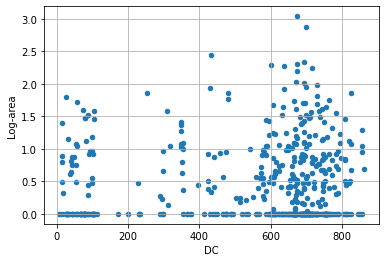

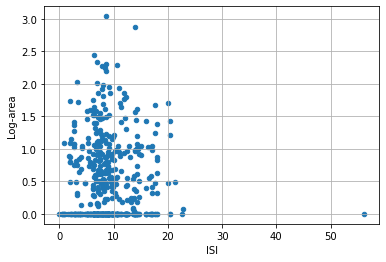

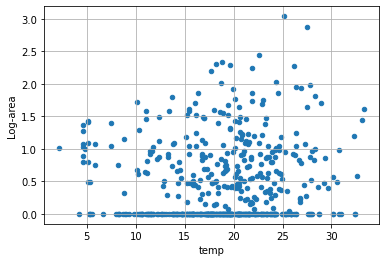

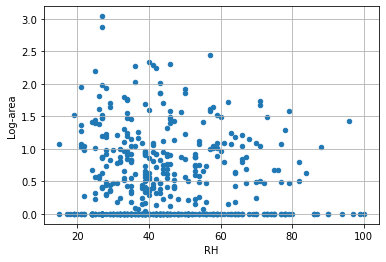

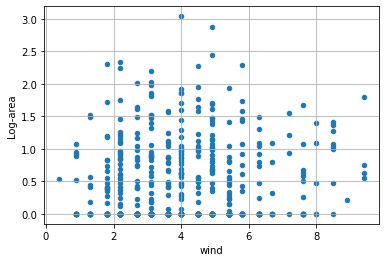

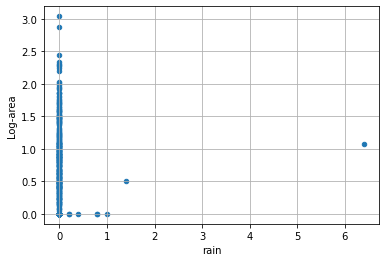

In [70]:
for i in forest.describe().columns[:-2]:
    forest.plot.scatter(i,'Log-area',grid=True)

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log-area', ylabel='Density'>

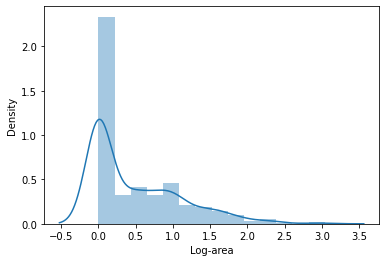

In [191]:
#Distplot after log transformation
sns.distplot(forest['Log-area'])

<AxesSubplot:title={'center':'Log-area'}, xlabel='day'>

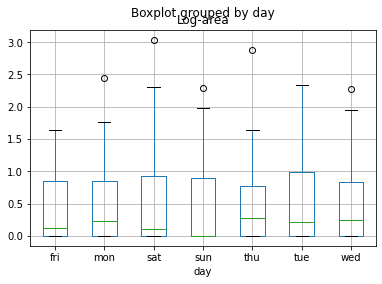

In [72]:
forest.boxplot(column='Log-area',by='day')

<AxesSubplot:title={'center':'Log-area'}, xlabel='month'>

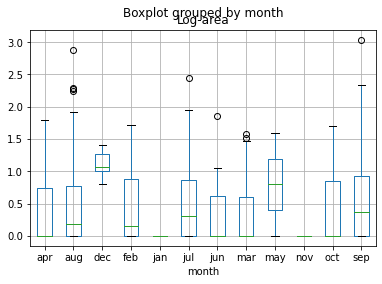

In [73]:
forest.boxplot(column='Log-area',by='month')

### Data pre-processing, train-test split, REC function

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [192]:
#converting categorical to numerical variables
encode = LabelEncoder()
encode.fit(forest['month'])

LabelEncoder()

In [76]:
encode.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [77]:
forest['month_encoded']=encode.transform(forest['month'])
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [78]:
encode.fit(forest['day'])

LabelEncoder()

In [79]:
encode.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [80]:
forest['day_encoded']=encode.transform(forest['day'])
forest.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0,1,3
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0,1,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0,1,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0,11,5
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0,11,2


In [81]:
test_size=0.4

### Create Four selection feature set-ups 

### 1) Naive Average Predictor

In [82]:
X_data=forest.drop(['area','Log-area','month','day'],axis=1)
y_data=forest['Log-area']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state = 42)

### 2) STFWI - spatial, temporal, four FWI components

In [83]:
first=forest.drop(['area','Log-area','month','day','temp','RH','wind','rain'],axis=1)
first_y=forest['Log-area']

train_x, test_x, train_y, test_y = train_test_split(first, first_y, test_size=test_size, random_state = 42)

### 3) STM - spatial, temporal, four weather variables

In [84]:
second=forest[['month_encoded','day_encoded','temp','RH','wind','rain']]
second_y=forest['Log-area']

training_x, testing_x, training_y, testing_y = train_test_split(second, second_y, test_size=test_size, random_state = 42)

### 4) FWI - four FWI components

In [85]:
third=forest[['FFMC','DMC','DC','ISI']]
third_y=forest['Log-area']

t_x, te_x, t_y, te_y = train_test_split(third, third_y, test_size=test_size, random_state = 42)

### 5) M - four weather variables

In [86]:
fourth=forest[['temp','RH','wind','rain']]
fourth_y=forest['Log-area']

Xtrain, Xtest, ytrain, ytest = train_test_split(fourth, fourth_y, test_size=test_size, random_state = 42)

### Reshaping values

In [87]:
y_train=y_train.values.reshape(y_train.size,1)

In [88]:
ytrain = ytrain.values.reshape(ytrain.size,1)

In [89]:
train_y = train_y.values.reshape(train_y.size,1)

In [90]:
training_y=training_y.values.reshape(training_y.size,1)

In [91]:
t_y=t_y.values.reshape(t_y.size,1)

In [92]:
X_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded
228,4,6,93.5,149.3,728.6,8.1,28.3,26,3.1,0.0,11,3
193,4,5,92.9,133.3,699.6,9.2,24.3,25,4.0,0.0,11,6
81,1,2,90.2,99.6,631.2,6.3,17.9,44,2.2,0.0,1,3
109,4,5,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0,11,1
428,1,3,94.8,222.4,698.6,13.9,26.2,34,5.8,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,11,0
106,4,5,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,7,4
270,2,2,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,1,5
435,2,5,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,5,2


### REC Estimation

In [93]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [94]:
# Maximum tolerance limit for REC curve x-axis
# This represents the absolute value of error in the prediction of the outcome i.e. area burned
tol_max=20

### MACHINE LEARNING MODELS

### Multiple Regression

In [95]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model

In [96]:
regr1 = LinearRegression(normalize=True)
regr1.fit(X_train,y_train)


regr2 = LinearRegression(normalize=True)
regr2.fit(train_x,train_y)

regr3 = LinearRegression(normalize=True)
regr3.fit(training_x,training_y)

regr4 = LinearRegression(normalize=True)
regr4.fit(t_x,t_y)

regr5 = LinearRegression(normalize=True)
regr5.fit(Xtrain,ytrain)


/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

LinearRegression(normalize=True)

In [97]:
y_pred1 = regr1.predict(X_test)
y_pred1

y_pred2 = regr2.predict(test_x)
y_pred2

y_pred3 = regr3.predict(testing_x)
y_pred3

y_pred4 = regr4.predict(te_x)
y_pred4

y_pred5 = regr5.predict(Xtest)
y_pred5

array([[0.5004795 ],
       [0.57031148],
       [0.45671435],
       [0.51206144],
       [0.54583692],
       [0.43543627],
       [0.47848391],
       [0.49058701],
       [0.47816088],
       [0.47001799],
       [0.50759753],
       [0.46093218],
       [0.4514039 ],
       [0.48185555],
       [0.5552052 ],
       [0.41633617],
       [0.44853705],
       [0.49337113],
       [0.50659441],
       [0.53275386],
       [0.48617273],
       [0.51307662],
       [0.50240493],
       [0.53148661],
       [0.5239101 ],
       [0.48978182],
       [0.44669574],
       [0.47021488],
       [0.43773165],
       [0.42091257],
       [0.58929894],
       [0.49693236],
       [0.44561147],
       [0.50043064],
       [0.50596757],
       [0.53357232],
       [0.44093772],
       [0.52054373],
       [0.48627827],
       [0.45586271],
       [0.48459663],
       [0.53148661],
       [0.41234929],
       [0.47328936],
       [0.47635875],
       [0.50680221],
       [0.42969798],
       [0.571

In [98]:
#Since y_pred is an array - we need to use the y_pred.flatten() function to compare the actual versus predicted results. 
y_pred1 = y_pred1.flatten()
y_pred1

y_pred2 = y_pred2.flatten()
y_pred2

y_pred3 = y_pred3.flatten()
y_pred3

y_pred4 = y_pred4.flatten()
y_pred4

y_pred5 = y_pred5.flatten()
y_pred5

array([0.5004795 , 0.57031148, 0.45671435, 0.51206144, 0.54583692,
       0.43543627, 0.47848391, 0.49058701, 0.47816088, 0.47001799,
       0.50759753, 0.46093218, 0.4514039 , 0.48185555, 0.5552052 ,
       0.41633617, 0.44853705, 0.49337113, 0.50659441, 0.53275386,
       0.48617273, 0.51307662, 0.50240493, 0.53148661, 0.5239101 ,
       0.48978182, 0.44669574, 0.47021488, 0.43773165, 0.42091257,
       0.58929894, 0.49693236, 0.44561147, 0.50043064, 0.50596757,
       0.53357232, 0.44093772, 0.52054373, 0.48627827, 0.45586271,
       0.48459663, 0.53148661, 0.41234929, 0.47328936, 0.47635875,
       0.50680221, 0.42969798, 0.57191752, 0.49169627, 0.52038019,
       0.51364063, 0.50296391, 0.50526915, 0.45627542, 0.54364708,
       0.53767352, 0.39369198, 0.47381219, 0.43191114, 0.46206072,
       0.41371899, 0.50829427, 0.51782255, 0.49829679, 0.46116313,
       0.44485751, 0.46521636, 0.45886097, 0.49407078, 0.49592396,
       0.48155039, 0.43982414, 0.50546878, 0.41883609, 0.41243

In [99]:
print("RMSE score for MLR - Naive:",np.sqrt(np.mean((y_test-y_pred1)**2)))
print("RMSE score for MLR - STFWI:",np.sqrt(np.mean((test_y-y_pred2)**2)))
print("RMSE score for MLR - STM:",np.sqrt(np.mean((testing_y-y_pred3)**2)))
print("RMSE score for MLR - FWI:",np.sqrt(np.mean((te_y-y_pred4)**2)))
print("RMSE score for MLR - M:",np.sqrt(np.mean((ytest-y_pred5)**2)))

RMSE score for MLR - Naive: 0.622005846080482
RMSE score for MLR - STFWI: 0.6266508674422681
RMSE score for MLR - STM: 0.6203683671030995
RMSE score for MLR - FWI: 0.6155089624375816
RMSE score for MLR - M: 0.6145209072681603


### Inverse Logarithmic transformation

In [100]:
print(np.sqrt(np.mean((y_test-y_pred1)**2))*100)
print(np.sqrt(np.mean((y_test-y_pred2)**2))*100)
print(np.sqrt(np.mean((y_test-y_pred3)**2))*100)
print(np.sqrt(np.mean((y_test-y_pred4)**2))*100)
print(np.sqrt(np.mean((y_test-y_pred5)**2))*100)

62.2005846080482
62.665086744226805
62.03683671030995
61.55089624375816
61.45209072681603


### Support Vector Regressor (SVR)

In [101]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [102]:
#standardise the data - mean = 0, standard deviation = 1
scaler = StandardScaler()

In [103]:
#Parameter grid for the Grid Search CV
param_grid = {'C': [3], 'gamma':[0.00195,0.00781, 0.03125, 0.03703, 0.5], 'kernel': ['rbf']}

In [104]:
#cv - 10 folds
gridSVR1 = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
gridSVR1.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))


gridSVR2 = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
gridSVR2.fit(scaler.fit_transform(train_x),scaler.fit_transform(train_y))


gridSVR3 = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
gridSVR3.fit(scaler.fit_transform(training_x),scaler.fit_transform(training_y))


gridSVR4 = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
gridSVR4.fit(scaler.fit_transform(t_x),scaler.fit_transform(t_y))


gridSVR5 = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=10)
gridSVR5.fit(scaler.fit_transform(Xtrain),scaler.fit_transform(ytrain))

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [3],
                         'gamma': [0.00195, 0.00781, 0.03125, 0.03703, 0.5],
                         'kernel': ['rbf']})

In [105]:
print("Best parameters obtained via Grid Search:",gridSVR1.best_params_)
print("Best parameters obtained via Grid Search:",gridSVR2.best_params_)
print("Best parameters obtained via Grid Search:",gridSVR3.best_params_)
print("Best parameters obtained via Grid Search:",gridSVR4.best_params_)
print("Best parameters obtained via Grid Search:",gridSVR5.best_params_)

Best parameters obtained via Grid Search: {'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Best parameters obtained via Grid Search: {'C': 3, 'gamma': 0.00195, 'kernel': 'rbf'}
Best parameters obtained via Grid Search: {'C': 3, 'gamma': 0.03703, 'kernel': 'rbf'}
Best parameters obtained via Grid Search: {'C': 3, 'gamma': 0.00195, 'kernel': 'rbf'}
Best parameters obtained via Grid Search: {'C': 3, 'gamma': 0.03703, 'kernel': 'rbf'}


In [106]:
t=gridSVR1.predict(X_test)
h=gridSVR2.predict(test_x)
a=gridSVR3.predict(testing_x)
n=gridSVR4.predict(te_x)
k=gridSVR5.predict(Xtest)

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [107]:
print("RMSE score for Support Vector Regression - Naive:",np.sqrt(np.mean((y_test-t)**2)))
print("RMSE score for Support Vector Regression - STFWI:",np.sqrt(np.mean((test_y-h)**2)))
print("RMSE score for Support Vector Regression - STM:",np.sqrt(np.mean((testing_y-a)**2)))
print("RMSE score for Support Vector Regression - FWI:",np.sqrt(np.mean((te_y-n)**2)))
print("RMSE score for Support Vector Regression - M:",np.sqrt(np.mean((ytest-k)**2)))

RMSE score for Support Vector Regression - Naive: 0.8096083673131442
RMSE score for Support Vector Regression - STFWI: 1.316712275723676
RMSE score for Support Vector Regression - STM: 0.6240823270545119
RMSE score for Support Vector Regression - FWI: 1.3639775393689544
RMSE score for Support Vector Regression - M: 0.6199556074579262


In [108]:
print(np.sqrt(np.mean((y_test-t)**2))*100)
print(np.sqrt(np.mean((y_test-h)**2))*100)
print(np.sqrt(np.mean((y_test-a)**2))*100)
print(np.sqrt(np.mean((y_test-n)**2))*100)
print(np.sqrt(np.mean((y_test-k)**2))*100)

80.96083673131443
131.6712275723676
62.4082327054512
136.39775393689544
61.99556074579262


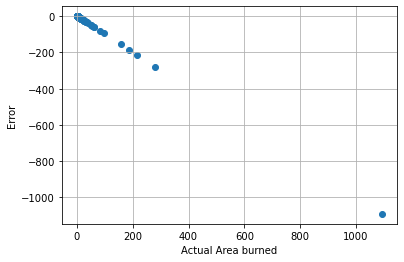

In [109]:
plt.xlabel("Actual Area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(t)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   1.,   1.,   5.,  11., 184.]),
 array([-1.09093219e+03, -1.06911539e+03, -1.04729859e+03, -1.02548179e+03,
        -1.00366499e+03, -9.81848188e+02, -9.60031388e+02, -9.38214588e+02,
        -9.16397788e+02, -8.94580988e+02, -8.72764188e+02, -8.50947388e+02,
        -8.29130588e+02, -8.07313788e+02, -7.85496988e+02, -7.63680188e+02,
        -7.41863388e+02, -7.20046588e+02, -6.98229788e+02, -6.76412988e+02,
        -6.54596188e+02, -6.32779388e+02, -6.10962588e+02, -5.89145788e+02,
        -5.67328988e+02, -5.45512188e+02, -5.23695388e+02, -5.01878588e+02,
        -4.80061788e+02, -4.58244988e+02, -4.36428188e+02, -4.14611388e+02,
        -3.92794588e+02, -3.70977788e+02, -3.49160

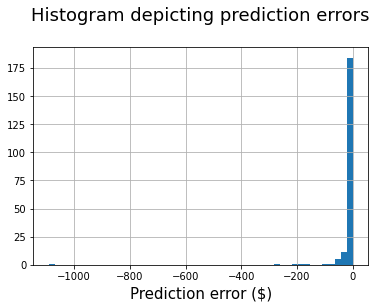

In [110]:
plt.title("Histogram depicting prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=15)
plt.grid(True)
plt.hist(10**(t.reshape(t.size,))-10**(y_test),bins=50)

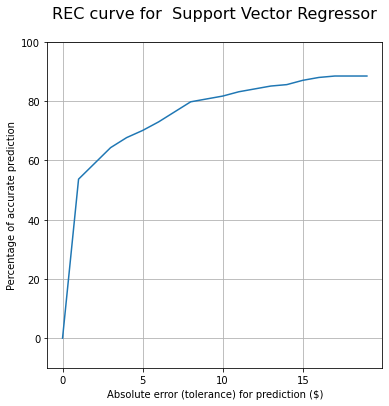

In [111]:
recSVR=[]
for i in range(tol_max):
    recSVR.append(rec(t,y_test,i))

plt.figure(figsize=(6,6))
plt.title("REC curve for  Support Vector Regressor\n",fontsize=16)
plt.xlabel("Absolute error (tolerance) for prediction ($)")
plt.ylabel("Percentage of accurate prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),recSVR)

### Decision Tree Regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
tree1 = DecisionTreeRegressor(max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01)
tree1.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

tree2 = DecisionTreeRegressor(max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01)
tree2.fit(scaler.fit_transform(train_x),scaler.fit_transform(train_y))

tree3 = DecisionTreeRegressor(max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01)
tree3.fit(scaler.fit_transform(training_x),scaler.fit_transform(training_y))

tree4 = DecisionTreeRegressor(max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01)
tree4.fit(scaler.fit_transform(t_x),scaler.fit_transform(t_y))

tree5 = DecisionTreeRegressor(max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01)
tree5.fit(scaler.fit_transform(Xtrain),scaler.fit_transform(ytrain))

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.01)

In [114]:
t=tree1.predict(X_test)
o=tree2.predict(test_x)
p=tree3.predict(testing_x)
i=tree4.predict(te_x)
c=tree5.predict(Xtest)

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [115]:
print("RMSE for Decision Tree - Naive:",np.sqrt(np.mean((y_test-t)**2)))
print("RMSE for Decision Tree - STFWI:",np.sqrt(np.mean((test_y-o)**2)))
print("RMSE for Decision Tree - STM:",np.sqrt(np.mean((testing_y-p)**2)))
print("RMSE for Decision Tree - FWI:",np.sqrt(np.mean((te_y-i)**2)))
print("RMSE for Decision Tree - M:",np.sqrt(np.mean((ytest-c)**2)))

RMSE for Decision Tree - Naive: 1.2130292814177965
RMSE for Decision Tree - STFWI: 1.1280666402649218
RMSE for Decision Tree - STM: 0.7718397372667477
RMSE for Decision Tree - FWI: 0.6712262468871099
RMSE for Decision Tree - M: 0.7718397372667477


### Inverse of Logarithmic output

In [116]:
print(np.sqrt(np.mean((y_test-t)**2))*100)
print(np.sqrt(np.mean((y_test-o)**2))*100)
print(np.sqrt(np.mean((y_test-p)**2))*100)
print(np.sqrt(np.mean((y_test-i)**2))*100)
print(np.sqrt(np.mean((y_test-c)**2))*100)

121.30292814177966
112.80666402649217
77.18397372667476
67.12262468871099
77.18397372667476


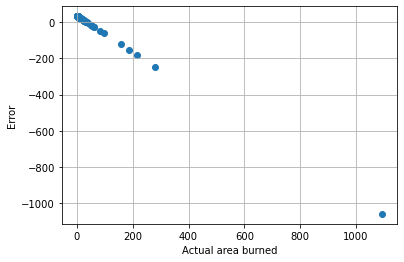

In [117]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(t)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   1.,   1.,   5.,  11., 184.]),
 array([-1058.22392264, -1036.40712264, -1014.59032264,  -992.77352264,
         -970.95672264,  -949.13992264,  -927.32312264,  -905.50632264,
         -883.68952264,  -861.87272264,  -840.05592264,  -818.23912264,
         -796.42232264,  -774.60552264,  -752.78872264,  -730.97192264,
         -709.15512264,  -687.33832264,  -665.52152264,  -643.70472264,
         -621.88792264,  -600.07112264,  -578.25432264,  -556.43752264,
         -534.62072264,  -512.80392264,  -490.98712264,  -469.17032264,
         -447.35352264,  -425.53672264,  -403.71992264,  -381.90312264,
         -360.08632264,  -338.26952264,  -316.45272264,  -294.63592264,
         -

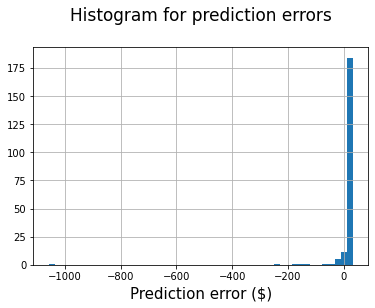

In [118]:
plt.title("Histogram for prediction errors\n",fontsize=17)
plt.xlabel("Prediction error ($)",fontsize=15)
plt.grid(True)
plt.hist(10**(t.reshape(t.size,))-10**(y_test),bins=50)

### Random Forest Regressor

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
RF1 = RandomForestRegressor(n_estimators=500,max_depth=10,criterion='squared_error',min_samples_split = 4,min_samples_leaf=2,min_weight_fraction_leaf=0.01, random_state = 42)
RF1.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

RF2 = RandomForestRegressor(n_estimators=500,max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01,random_state = 42)
RF2.fit(scaler.fit_transform(train_x),scaler.fit_transform(train_y))

RF3 = RandomForestRegressor(n_estimators=500,max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01,random_state = 42)
RF3.fit(scaler.fit_transform(training_x),scaler.fit_transform(training_y))

RF4 = RandomForestRegressor(n_estimators=500,max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01,random_state = 42)
RF4.fit(scaler.fit_transform(t_x),scaler.fit_transform(t_y))

RF5 = RandomForestRegressor(n_estimators=500,max_depth=10,criterion='squared_error',min_samples_split =4,min_samples_leaf=2,min_weight_fraction_leaf=0.01,random_state = 42)
RF5.fit(scaler.fit_transform(Xtrain),scaler.fit_transform(ytrain))

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1980/3856972957.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF1.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1980/3856972957.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF2.fit(scaler.fit_transform(train_x),scaler.fit_transform(train_y))
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1980/3856972957.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF3.fit(scaler.fit_transform(training_x),scaler.fit_transform(training_y))
/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_1980/385697295

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.01, n_estimators=500,
                      random_state=42)

In [162]:
t=RF1.predict(X_test)
u=RF2.predict(test_x)
p=RF3.predict(testing_x)
l=RF4.predict(te_x)
e=RF5.predict(Xtest)

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [163]:
rmse_for1=np.sqrt(np.mean((y_test-t)**2))
print("RMSE for Random Forest- Naive:",rmse_for1)

rmse_for2=np.sqrt(np.mean((test_y-u)**2))
print("RMSE for Random Forest- STFWI:",rmse_for2)

rmse_for3=np.sqrt(np.mean((testing_y-p)**2))
print("RMSE for Random Forest - STM:",rmse_for3)

rmse_for4=np.sqrt(np.mean((te_y-l)**2))
print("RMSE for Random Forest - FWI:",rmse_for4)

rmse_for5=np.sqrt(np.mean((ytest-e)**2))
print("RMSE for Random Forest - M:",rmse_for5)

RMSE for Random Forest- Naive: 0.7980490939318606
RMSE for Random Forest- STFWI: 0.6285962210040941
RMSE for Random Forest - STM: 0.6641304154514024
RMSE for Random Forest - FWI: 0.6173778309615823
RMSE for Random Forest - M: 0.6364977503303905


### Inverse Logarithmic output

In [170]:
print(rmse_for1*100)
print(rmse_for2*100)
print(rmse_for3*100)
print(rmse_for4*100)
print(rmse_for5*100)

79.80490939318607
62.85962210040941
66.41304154514025
61.737783096158225
63.64977503303905


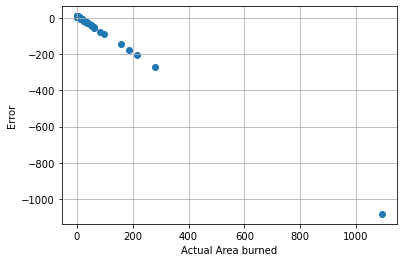

In [164]:
plt.xlabel("Actual Area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(t)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   1.,   1.,   5.,  11., 184.]),
 array([-1082.39638331, -1060.55534982, -1038.71431632, -1016.87328283,
         -995.03224933,  -973.19121584,  -951.35018235,  -929.50914885,
         -907.66811536,  -885.82708186,  -863.98604837,  -842.14501487,
         -820.30398138,  -798.46294788,  -776.62191439,  -754.78088089,
         -732.9398474 ,  -711.0988139 ,  -689.25778041,  -667.41674692,
         -645.57571342,  -623.73467993,  -601.89364643,  -580.05261294,
         -558.21157944,  -536.37054595,  -514.52951245,  -492.68847896,
         -470.84744546,  -449.00641197,  -427.16537848,  -405.32434498,
         -383.48331149,  -361.64227799,  -339.8012445 ,  -317.960211  ,
         -

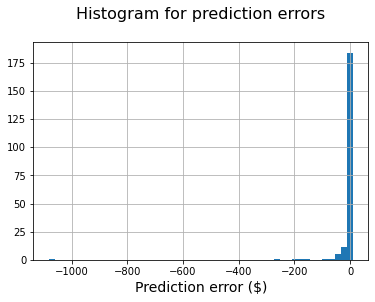

In [165]:
plt.title("Histogram for prediction errors\n",fontsize=16)
plt.xlabel("Prediction error ($)",fontsize=14)
plt.grid(True)
plt.hist(10**(t.reshape(t.size,))-10**(y_test),bins=50)

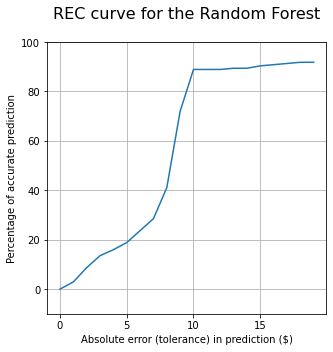

In [166]:
recRF=[]
for i in range(tol_max):
    recRF.append(rec(t,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=16)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of accurate prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),recRF)

### Deep network (using Keras package (TensorFlow backend))

Description - I tried installing TensorFlow package in this environment, however, when I run the below code  it comes up as a dead kernel. I therefore, uninstalled and reinstalled my Anaconda Navigator and Python version - 3.9.1. 

After installing the new version, I created a new environment named tensorflow to install the tensorflow packages and the keras package, however, when I open the Jupyter notebook(tensorflow), i am able to install keras and tensorflow package but not other various packages such as matplotlib.pyplot or sklearn.model_selection. 

Additionally, I tried running the below code in Google collab which works fine since it is on Cloud, however, I am not able to upload my dataset and run the neural network on the dataset. 

From my experience, downloading tensorflow package, my kernel was not supporting it, thus, I couldn't get the required RMSE result for Neural Network. Although, I have still provided the REC curve for Deep Neural Network to compare against other models. 

If possible, when you download this .ipynb file,  if you have tensorflow package in your anaconda environment, you can see the RMSE results. 

### Therefore I have used the Multilayer Perceptron Regressor to get the predicted results

In [167]:
#from keras.models import Sequential
#import keras.optimizers as opti
#from keras.layers import Dense, Activation,Dropout
#pip install keras
#pip install tensorflow

In [ ]:
#nn_model = Sequential()

#nn_model.add(Dense(100, input_dim=12))

#nn_model.add(Activation('logistic'))

#nn_model.add(Dropout(0.3))

#nn_model.add(Dense(100))

#nn_model.add(Dropout(0.3))

#nn_model.add(Activation('logistic'))

#nn_model.add(Dense(50))
#nn_model.add(Activation('logistic'))
#nn_model.add(Dense(1))
#nn_model.summary()

In [ ]:
#learning_r=0.001
#optimizer = opti.RMSprop(lr=learning_r)
#nn_model.compile(optimizer=optimizer,loss='mse')

In [ ]:
#dataset=X_train
#target = y_train
#nn_model.fit(dataset, target, epochs=100, batch_size=10,verbose=0)

### Multilayer Perceptron Regressor

In [194]:
from sklearn.neural_network import MLPRegressor

nn_model1 = MLPRegressor(hidden_layer_sizes=4, activation='logistic', solver='lbfgs',learning_rate='constant', learning_rate_init=0.001,max_iter=200)
nn_model1.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

nn_model2 = MLPRegressor(hidden_layer_sizes=4, activation='logistic', solver='lbfgs',learning_rate='constant', learning_rate_init=0.001,max_iter=200)
nn_model2.fit(scaler.fit_transform(train_x),scaler.fit_transform(train_y))

nn_model3 = MLPRegressor(hidden_layer_sizes=4, activation='logistic', solver='lbfgs',learning_rate='constant', learning_rate_init=0.001,max_iter=200)
nn_model3.fit(scaler.fit_transform(training_x),scaler.fit_transform(training_y))

nn_model4 = MLPRegressor(hidden_layer_sizes=4, activation='logistic', solver='lbfgs',learning_rate='constant', learning_rate_init=0.001,max_iter=200)
nn_model4.fit(scaler.fit_transform(t_x),scaler.fit_transform(t_y))

nn_model5 = MLPRegressor(hidden_layer_sizes=4, activation='logistic', solver='lbfgs',learning_rate='constant', learning_rate_init=0.001,max_iter=200)
nn_model5.fit(scaler.fit_transform(Xtrain),scaler.fit_transform(ytrain))


/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

MLPRegressor(activation='logistic', hidden_layer_sizes=4, solver='lbfgs')

In [195]:
t=nn_model1.predict(X_test)
print("RMSE for Neural Network:",np.sqrt(np.mean((y_test-t.reshape(t.size,))**2)))

r=nn_model2.predict(test_x)
print("RMSE for Neural Network:",np.sqrt(np.mean((test_y-r.reshape(r.size,))**2)))


a=nn_model3.predict(testing_x)
print("RMSE for Neural Network:",np.sqrt(np.mean((testing_y-a.reshape(a.size,))**2)))


u=nn_model4.predict(te_x)
print("RMSE for Neural Network:",np.sqrt(np.mean((te_y-u.reshape(u.size,))**2)))


b=nn_model5.predict(Xtest)
print("RMSE for Neural Network:",np.sqrt(np.mean((ytest-b.reshape(b.size,))**2)))


RMSE for Neural Network: 0.7142272698624823
RMSE for Neural Network: 1.0408860488642093
RMSE for Neural Network: 0.8152545960143818
RMSE for Neural Network: 1.2036225210616889
RMSE for Neural Network: 1.3508105647193884


/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


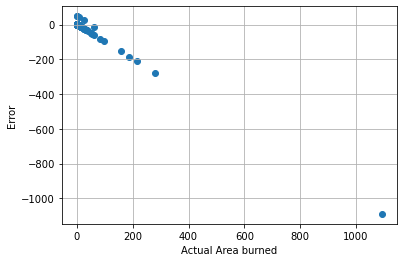

In [152]:
plt.xlabel("Actual Area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(t.reshape(t.size,))-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.,   2.,   1.,   6.,  19., 174.]),
 array([-1091.71005992, -1069.68041129, -1047.65076267, -1025.62111404,
        -1003.59146542,  -981.56181679,  -959.53216816,  -937.50251954,
         -915.47287091,  -893.44322229,  -871.41357366,  -849.38392503,
         -827.35427641,  -805.32462778,  -783.29497915,  -761.26533053,
         -739.2356819 ,  -717.20603328,  -695.17638465,  -673.14673602,
         -651.1170874 ,  -629.08743877,  -607.05779015,  -585.02814152,
         -562.99849289,  -540.96884427,  -518.93919564,  -496.90954702,
         -474.87989839,  -452.85024976,  -430.82060114,  -408.79095251,
         -386.76130389,  -364.73165526,  -342.70200663,  -320.67235801,
         -

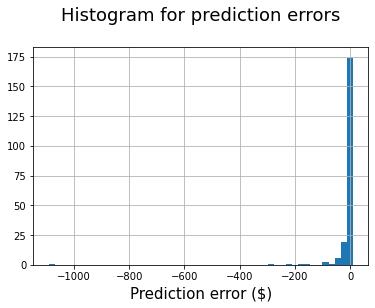

In [173]:
plt.title("Histogram for prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=15)
plt.grid(True)
plt.hist(10**(t.reshape(t.size,))-10**(y_test),bins=50)

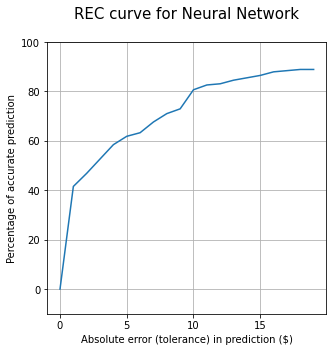

In [174]:
recNN=[]
for i in range(tol_max):
    recNN.append(rec(t,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for Neural Network\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of accurate prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),recNN)

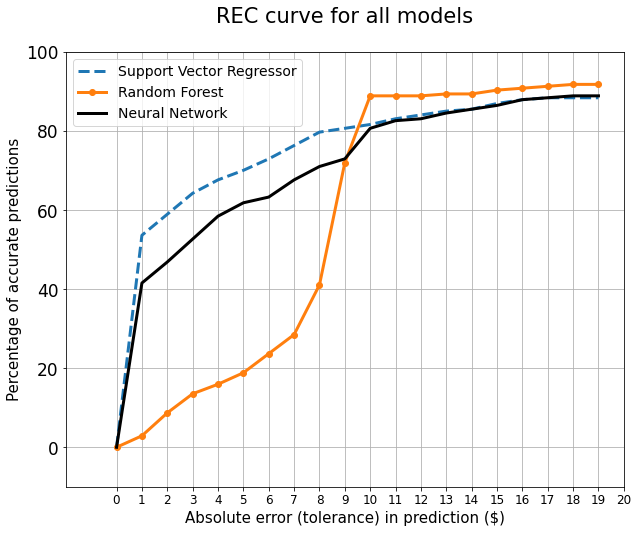

In [175]:
plt.figure(figsize=(10,8))
plt.title("REC curve for all models\n",fontsize=21)
plt.xlabel("Absolute error (tolerance) in prediction ($)",fontsize=15)
plt.ylabel("Percentage of accurate predictions",fontsize=15)
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=12)
plt.ylim(-10,100)
plt.xlim(-2,tol_max)
plt.yticks([i*20 for i in range(6)],fontsize=17)
plt.grid(True)
plt.plot(range(tol_max),recSVR,'--',lw=3)
plt.plot(range(tol_max),recRF,'o-',lw=3)
plt.plot(range(tol_max),recNN,'k-',lw=3)
plt.legend(['Support Vector Regressor','Random Forest','Neural Network'],fontsize=14)

# Q-2 Novel ML model on all feature sets -  L2 Regularised linear regression

In [225]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [228]:
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ridgelr1 = Ridge(alpha=1.0)
ridgelr1.fit(X_train,y_train)

ridgelr2 = Ridge(alpha = 1.0,normalize=True)
ridgelr2.fit(train_x,train_y)

ridgelr3 = Ridge(alpha = 1.0,normalize=True)
ridgelr3.fit(training_x,training_y)

ridgelr4 = Ridge(alpha = 1.0,normalize=True)
ridgelr4.fit(t_x,t_y)

ridgelr5 = Ridge(alpha = 1.0,normalize=True)
ridgelr5.fit(Xtrain,ytrain)


/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

Ridge(normalize=True)

In [229]:
ridge_pred1 = ridgelr1.predict(X_test)
ridge_pred1

ridge_pred2 = ridgelr2.predict(test_x)
ridge_pred2

ridge_pred3 = ridgelr3.predict(testing_x)
ridge_pred3

ridge_pred4 = ridgelr4.predict(te_x)
ridge_pred4

ridge_pred5 = ridgelr5.predict(Xtest)
ridge_pred5

array([[0.48630692],
       [0.52355251],
       [0.46911986],
       [0.49535925],
       [0.50895545],
       [0.46434119],
       [0.47926292],
       [0.48318654],
       [0.48052637],
       [0.47053118],
       [0.49073063],
       [0.4712412 ],
       [0.46716054],
       [0.48132333],
       [0.51655029],
       [0.45215383],
       [0.46489084],
       [0.4875801 ],
       [0.49483813],
       [0.50517862],
       [0.48900311],
       [0.49795267],
       [0.50471961],
       [0.50762559],
       [0.5006004 ],
       [0.48479391],
       [0.46784283],
       [0.47382988],
       [0.4616442 ],
       [0.45813235],
       [0.52926676],
       [0.49096519],
       [0.46418002],
       [0.48947876],
       [0.49957565],
       [0.50310823],
       [0.45909614],
       [0.49917157],
       [0.48564877],
       [0.46979248],
       [0.48270615],
       [0.50762559],
       [0.45029525],
       [0.47657752],
       [0.47732846],
       [0.49395095],
       [0.45882041],
       [0.530

In [230]:
#Since ridge_pred is an array - we need to use the ridge_pred.flatten() function to compare the actual versus predicted results. 
ridge_pred1 = ridge_pred1.flatten()
ridge_pred1

ridge_pred2 = ridge_pred2.flatten()
ridge_pred2

ridge_pred3 = ridge_pred3.flatten()
ridge_pred3

ridge_pred4 = ridge_pred4.flatten()
ridge_pred4

ridge_pred5 = ridge_pred5.flatten()
ridge_pred5

array([0.48630692, 0.52355251, 0.46911986, 0.49535925, 0.50895545,
       0.46434119, 0.47926292, 0.48318654, 0.48052637, 0.47053118,
       0.49073063, 0.4712412 , 0.46716054, 0.48132333, 0.51655029,
       0.45215383, 0.46489084, 0.4875801 , 0.49483813, 0.50517862,
       0.48900311, 0.49795267, 0.50471961, 0.50762559, 0.5006004 ,
       0.48479391, 0.46784283, 0.47382988, 0.4616442 , 0.45813235,
       0.52926676, 0.49096519, 0.46418002, 0.48947876, 0.49957565,
       0.50310823, 0.45909614, 0.49917157, 0.48564877, 0.46979248,
       0.48270615, 0.50762559, 0.45029525, 0.47657752, 0.47732846,
       0.49395095, 0.45882041, 0.53058043, 0.49070684, 0.49590553,
       0.49719981, 0.49174876, 0.49066473, 0.4711094 , 0.5082981 ,
       0.51413491, 0.44527899, 0.47552147, 0.45926259, 0.47075079,
       0.44895033, 0.49556889, 0.49964954, 0.4889887 , 0.47150396,
       0.46633842, 0.47615809, 0.46813159, 0.48932707, 0.49444113,
       0.48310515, 0.46319619, 0.49223725, 0.45439116, 0.45186

In [231]:
print("RMSE score for Ridge - Naive:",np.sqrt(np.mean((y_test-ridge_pred1)**2)))
print("RMSE score for Ridge - STFWI:",np.sqrt(np.mean((test_y-ridge_pred2)**2)))
print("RMSE score for Ridge - STM:",np.sqrt(np.mean((testing_y-ridge_pred3)**2)))
print("RMSE score for Ridge - FWI:",np.sqrt(np.mean((te_y-ridge_pred4)**2)))
print("RMSE score for Ridge - M:",np.sqrt(np.mean((ytest-ridge_pred5)**2)))

RMSE score for Ridge - Naive: 0.6219933017334118
RMSE score for Ridge - STFWI: 0.618059442902002
RMSE score for Ridge - STM: 0.6172556674286561
RMSE score for Ridge - FWI: 0.6157064940988809
RMSE score for Ridge - M: 0.6153993420859809


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   1.,   1.,   5.,  11., 184.]),
 array([-1087.64347098, -1065.81393998, -1043.98440898, -1022.15487798,
        -1000.32534698,  -978.49581598,  -956.66628498,  -934.83675398,
         -913.00722298,  -891.17769198,  -869.34816098,  -847.51862998,
         -825.68909898,  -803.85956798,  -782.03003698,  -760.20050598,
         -738.37097498,  -716.54144398,  -694.71191298,  -672.88238198,
         -651.05285098,  -629.22331998,  -607.39378898,  -585.56425798,
         -563.73472698,  -541.90519598,  -520.07566498,  -498.24613398,
         -476.41660298,  -454.58707198,  -432.75754098,  -410.92800998,
         -389.09847898,  -367.26894798,  -345.43941698,  -323.60988598,
         -

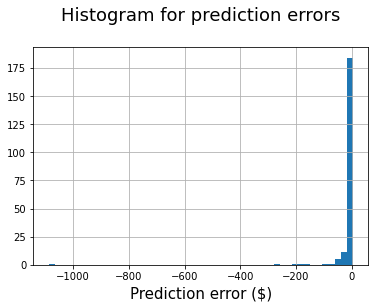

In [232]:
plt.title("Histogram for prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($)",fontsize=15)
plt.grid(True)
plt.hist(10**(ridge_pred1.reshape(ridge_pred1.size,))-10**(y_test),bins=50)

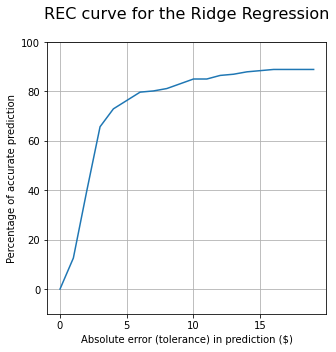

In [233]:
recRidge=[]
for i in range(tol_max):
    recRidge.append(rec(ridge_pred1,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Ridge Regression\n",fontsize=16)
plt.xlabel("Absolute error (tolerance) in prediction ($)")
plt.ylabel("Percentage of accurate prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),recRidge)